done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


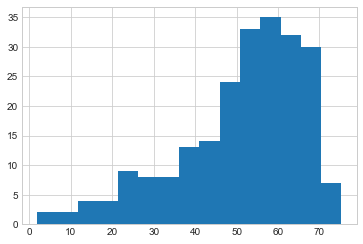

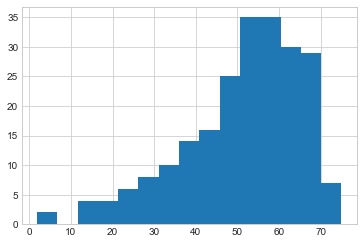

In [8]:
'''
used this to calculate inclinations for the final Kepler sample
- ran Monte carlo simulations rather then using raw data
'''

import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_linear_regression
import csv
import pandas
import statistics
import random
import math

data = genfromtxt('starsData.csv',delimiter=',',dtype='float')
#cols: vsini, e_vsini, prot, e_prot, radius, e_r
#e_prot of 0 means no error given
rows,cols=data.shape

RSun = 695700

e_VSINIobs=[]
VSINIobs = []
Pobs = []
e_Pobs = []
Robs = []
e_Robs = []
IsummaryMedian = []
IsummaryMean = []

for j in range(0,225):
    #Rtrue = np.random.normal(random.choice(data[:,4]),random.choice(data[:,5]))
    #Ptrue = np.random.normal(random.choice(data[:,2]),random.choice(data[:,3]))

    Rtrue = data[j,4]
    e_Rtrue = data[j,5]
    
    Ptrue = data[j,2]
    e_Ptrue = data[j,3]

    VSINItrue = data[j,0]
    e_VSINIobs = data[j,1]
    
    VSINIobs = np.random.normal(VSINItrue,e_VSINIobs)
    Robs = np.random.normal(Rtrue,e_Rtrue)
    e_Robs = e_Rtrue
    Pobs = np.random.normal(Ptrue,e_Ptrue)
    e_Pobs = e_Ptrue
    
    '''
    e_VSINIobs.append(random.choice(data[:,1]))
    VSINIobs.append(np.random.normal(VSINItrue,e_VSINIobs))
    Robs.append(np.random.normal(Rtrue,e_Rtrue))
    e_Robs.append(e_Rtrue)    
    Pobs.append(np.random.normal(Ptrue,e_Ptrue))
    e_Pobs.append(e_Ptrue)
    '''

    Pmonte = np.random.normal(Pobs,e_Pobs,100000)
    Rmonte = np.random.normal(Robs,e_Robs,100000)
    VSINImonte = np.random.normal(VSINIobs,e_VSINIobs,100000)

    iSINImonte = VSINImonte/(2*np.pi*Rmonte*RSun/(Pmonte*24*3600))
    SINImonte = []

    for num in iSINImonte:
        if num>= 0 and num <=1:
            SINImonte.append(num)

    Imonte = np.arcsin(SINImonte)

    for i in range(0,len(Imonte)):
        Imonte[i]=math.degrees(Imonte[i])
        
    IsummaryMedian.append(statistics.median(Imonte))
    IsummaryMean.append(statistics.mean(Imonte))
    print('done')

with open("IsummaryMedian.csv", 'w') as f:
    for num in IsummaryMedian:
        f.write(str(num)+'\n')
            
plt.hist(IsummaryMedian, bins = 15)
#plt.title('i = 45')
plt.show() 

plt.hist(IsummaryMean, bins = 15)
plt.show()
